### Analytic Approach

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

*First and foremost is to analyze the business problem by reading the story and doing constant communication with the stakeholders, in this project, we have already given the problem ie. to predict the quality of the red wine. Secondly, I will acquire the data from the business required to test the quality, In our case, CSV with the data has been provided with some samples. Then, afterward, the exploration of data frames with some statistical and visualization methods is done to find anomalies, patterns, and types of problems, to make the data tidy, feature selection, and algorithm selection.*

*I believe, this approach is right because it will cover each and every area to work from top to bottom. It will identify the problem, collection of data and its manipulation as well as the type of problem identification for the test to carry out and algorithm selection.*

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

*The data which contains the elements with their concentration which has been used to produce red wine is crucial for determining the quality of the red wine, and statistical data and the relationship between the elements will determine the indicators for the best quality wine.*

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from scipy import stats

### Data Collection

**Q3. From where do we get our data?**

*For the data collection, I used the file winequality-red.csv provided in the blackboard assignment view. The dataset includes 1599 rows which will be used to carry out this test.*

In [12]:
red_wine_data = pd.read_csv("data/winequality-red.csv")
red_wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Data Understanding

**Q4. From where are red wine samples obtained?**

*The red wine samples are taken from the north of Portugal.* 

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

*The quality of wine will help to retain the customers which eventually make the business flourish. To maintain the quality, the concentration(variable) needs to be maintained in its optimal form. The overall percentile of variables need to be kept recorded and regular test for quality need to be done. The business profit and loss depends upon the quality. The distributors will only keep those wines that have greater involvement of customers, these variables can make distributors for open claimings and confidence to market the product. Meanwhile, the producers can maintain the consistency of the variables to produce quality wine.*

In [13]:
# Check the shape of data
red_wine_data.shape

(1599, 12)

In [14]:
# Checking the datatypes of the features
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
# checking statistical data for the dataframes
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Data Preparation

#### Exploring the dataset further

<li> Checking for missing values </li>

In [16]:
red_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<li> Checking for outliers using box plot and handling them </li>

In [17]:
red_wine_data_without_quality = red_wine_data.drop('quality', axis = 1)

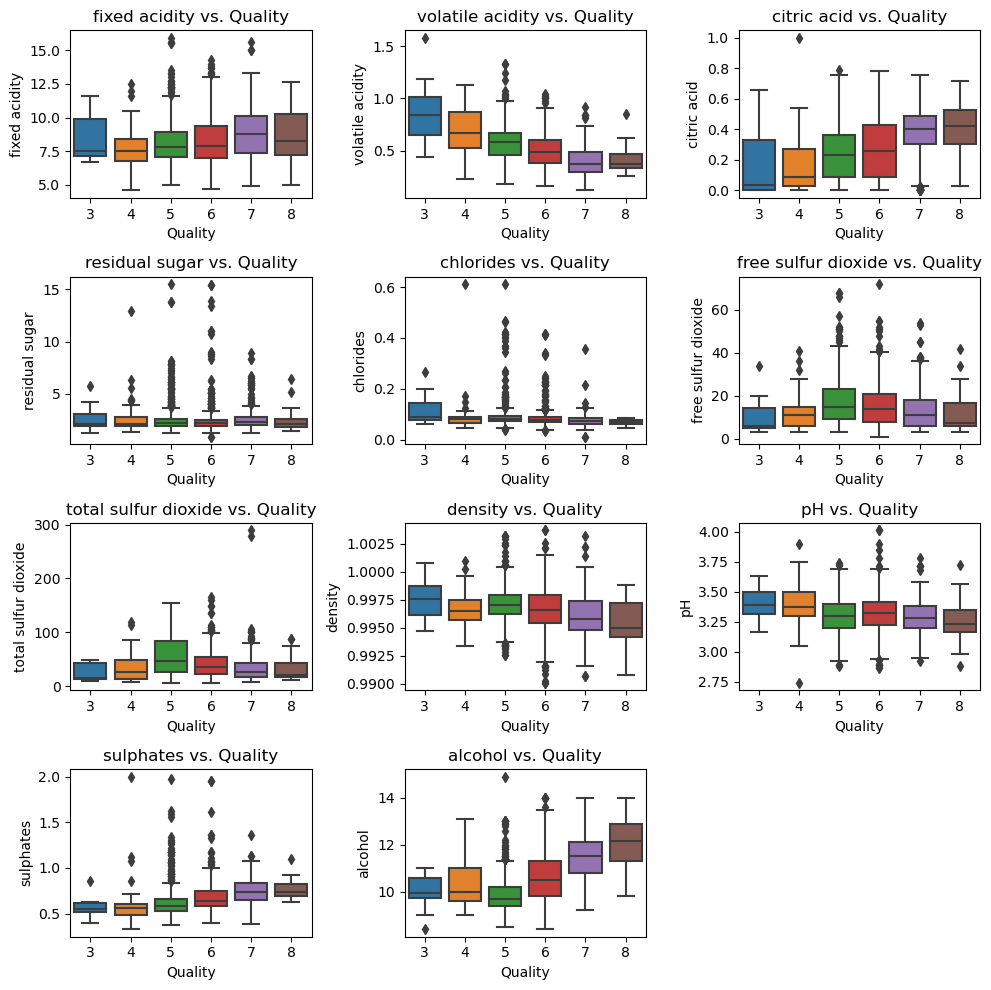

In [18]:
plt.figure(figsize=(10, 10))
for index, feature in enumerate(red_wine_data_without_quality.columns):
    plt.subplot(4, 3, index + 1)
    sns.boxplot(x="quality", y=feature, data=red_wine_data)
    plt.title(f"{feature} vs. Quality")
    plt.xlabel("Quality")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

*Analysis of box plots shows the negligible effect of total sulfur dioxide, free sulfur dioxide, residual sugar, and fixed acidity as they show a steady state until the end. The alcohol shows a high impact on quality, quality increases as the alcohol amount is increased. A similar increment pattern can be seen for sulfates, and citric acid whilst pH, density, chlorides, and volatile acidity shows inverse effect.*

In [19]:
z_scores = stats.zscore(red_wine_data)
threshold = 2.7
red_wine_data_without_outliers = red_wine_data[(z_scores < threshold).all(axis=1)]
red_wine_data_without_outliers.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000,1383.000000
mean,8.261316,0.523073,0.258171,2.354447,0.081231,14.966739,42.840926,0.996679,3.318583,0.637881,10.388636,5.619667
std,1.590961,0.165889,0.187628,0.800504,0.020290,9.065147,27.898475,0.001676,0.139418,0.125724,0.977782,0.755082
min,5.100000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.200000,0.079000,13.000000,36.000000,0.996700,3.320000,0.620000,10.200000,6.000000
75%,9.100000,0.635000,0.410000,2.500000,0.089000,21.000000,57.500000,0.997710,3.400000,0.710000,11.000000,6.000000
max,13.000000,1.010000,0.760000,6.300000,0.214000,43.000000,135.000000,1.001400,3.720000,1.110000,13.200000,7.000000


*I did some random tests for thresholds to preserve the important outliers. After the adjustment to 2.7, I removed some of the outliers and checked the stats. 216 rows are removed as outliers.*

<li>Implementation Correlation heatmap</li>

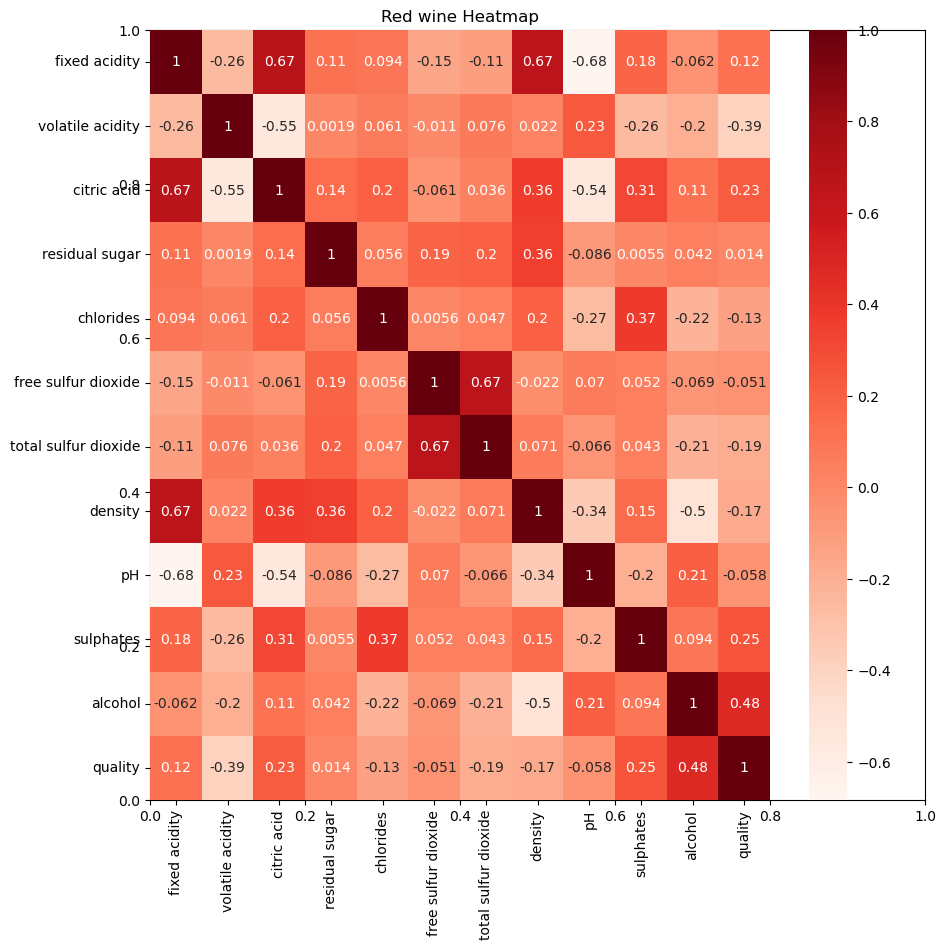

In [20]:
plt.subplots(figsize=(10,10))
ax = plt.axes()
ax.set_title("Red wine Heatmap")
correlation = red_wine_data.corr()
sns.heatmap(correlation,cbar = True, annot = True, ax = ax, cmap = "Reds")
plt.show()

Here in the correlation heatmap, I can see free sulfur dioxide and total sulfur dioxide are the highest correlated variable but the value is only 0.67, and citric acid and fixed acidity are also correlated with the same percentile, it's not that high, so I will not remove it.

<li>Check the distribution of data using histograms</li>

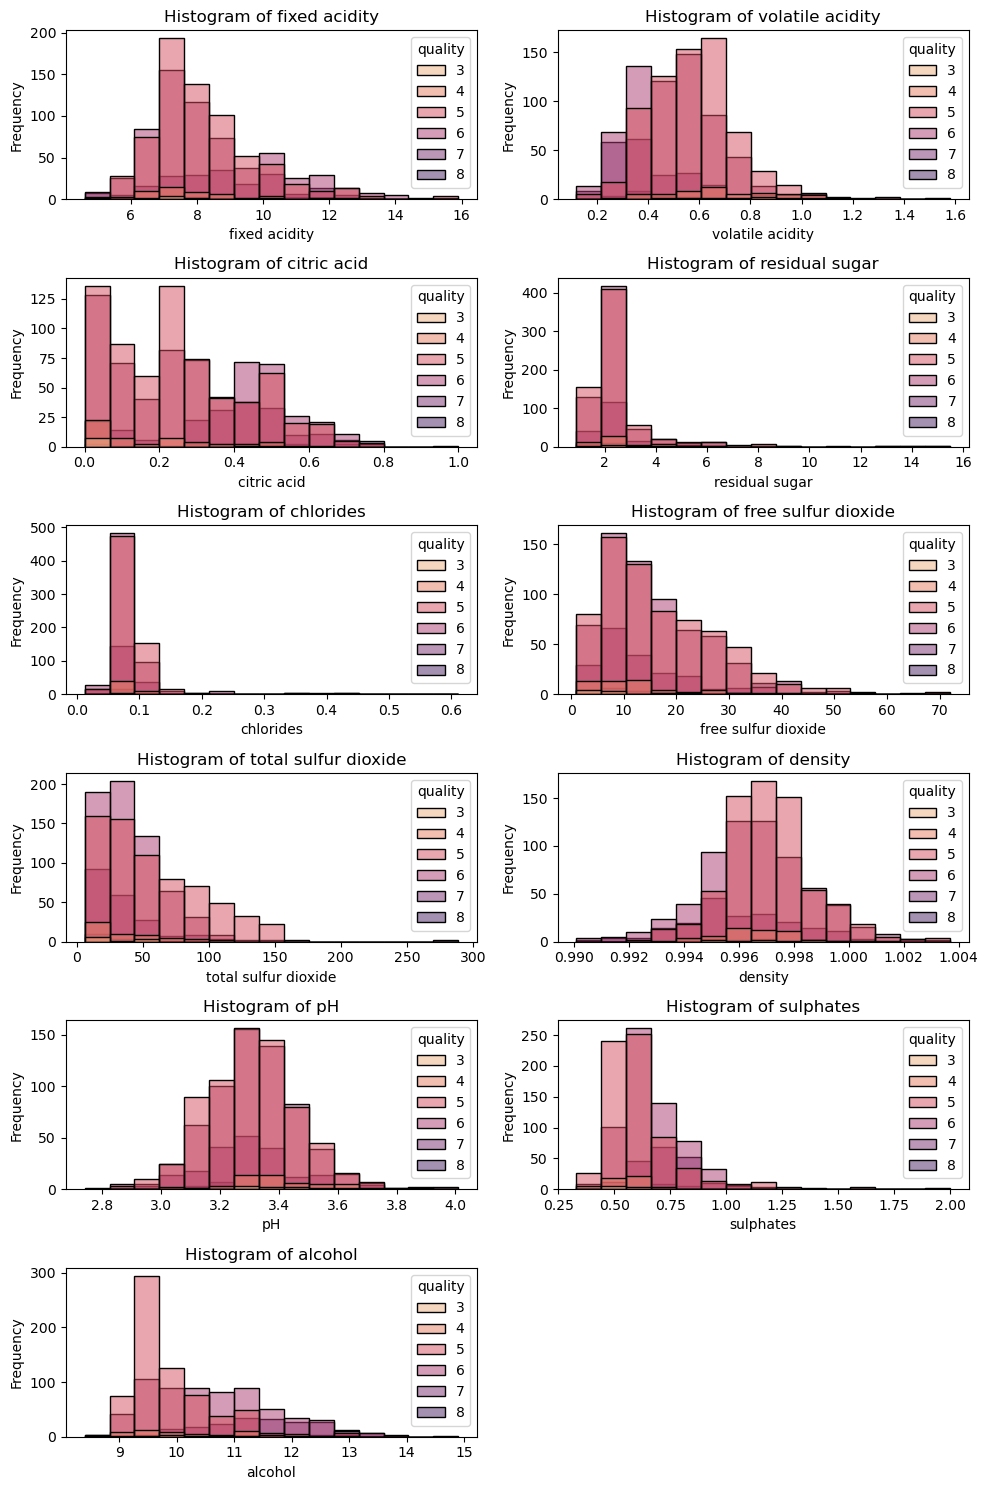

In [21]:
plt.figure(figsize=(10, 15))
for index, feature in enumerate(red_wine_data_without_quality):
    plt.subplot(6, 2, index+1)
    sns.histplot(data=red_wine_data, x=feature, hue='quality', kde=False, palette='flare', bins=15)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

*The histogram shows the distribution of each variable in our data frame against the quality of the red wine. For example, alcohol is showing, its current concentration of 9.2 - 9.8 which has high frequency for this dataset which is of average quality. If the concentration was 11.5 -13.5, this would have increased the quality of the red wine. Similarly, for the volatile acidity, it will be better to maintain the lowest at 0.25. These kinds of analysis insights are acquired from these charts.*

<li>Preparing the data for modeling</li>

In [22]:
x = red_wine_data_without_outliers.drop("quality",axis=1)
y = red_wine_data_without_outliers['quality']
# splitting data for train and test 50 50
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Modeling

<li>Implementing Multivariable Linear Regression using Lasso Regression and Ridge Regression algorithms</li>
<li>Use of three metrics: R-squared, RMSE, and MAE, to evaluate model prediction performance</li>

In [23]:
lasso = Lasso(alpha = 0.2)
ridge = Ridge(alpha = 0.2)

for model in [lasso, ridge]:
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)

    print(f"Results for::::::: {model}")
    
    meanAbsoluteError = mean_absolute_error(y_test, prediction)
    print(f"Mean Absolute error::::::: {meanAbsoluteError:.2f}")

    rootMeanSquaredError = np.sqrt(mean_squared_error(y_test, prediction))
    print(f"Root Mean Squared Error:::::: {rootMeanSquaredError:.2f}")

    rSquared = r2_score(y_test, prediction)
    print(f"R-squared :::::: {rSquared:.2f} \n")

Results for::::::: Lasso(alpha=0.2)
Mean Absolute error::::::: 0.52
Root Mean Squared Error:::::: 0.63
R-squared :::::: 0.19 

Results for::::::: Ridge(alpha=0.2)
Mean Absolute error::::::: 0.43
Root Mean Squared Error:::::: 0.56
R-squared :::::: 0.37 



### Model Evaluation

<li>Compare these 3 metrics for the two models and analyze the performance.</li>

-------------------------------------------------------------

Results for::::::: Lasso(alpha=0.2)

Mean Absolute error::::::: 0.52

Root Mean Squared Error:::::: 0.63

R-squared :::::: 0.19 

---------------------------------------------------
Results for::::::: Ridge(alpha=0.2)

Mean Absolute error::::::: 0.43

Root Mean Squared Error:::::: 0.56

R-squared :::::: 0.37 

-----------------------------------------------------

1. I split our data in 50 50 ratio. I trained the lasso model and ridge model using the train data and predicted the metrics against the test data. 
2. I have the actual mean = 5.619667 and standard deviation = 0.755082 for the target variable::
For lasso regression the mean absolute error is 0.52 while it is 0.43 for Ridge, taking the mean into consideration both models are performing well. The ridge is performing well looking at this metric.
3. On comparing root mean squared error, again the spread of the prediction is minimal for ridge than lasso regression which is at 0.56.
4. Similarly, R-squared metrics for Ridge show 37% which is again higher than Lasso's 19%.
Overall the Ridge model is performing well with the quality test of Red wine.


<li>Calculating the feature importance scores for the top features that help predicting wine quality using RandomForestRegressor and visualization of it in bar diagram</li>

Feature 0: fixed acidity, Score: 0.04786706467898369
Feature 1: volatile acidity, Score: 0.09868758804086794
Feature 2: citric acid, Score: 0.053570521488078685
Feature 3: residual sugar, Score: 0.06448358215096935
Feature 4: chlorides, Score: 0.0742454289815669
Feature 5: free sulfur dioxide, Score: 0.04692627743027518
Feature 6: total sulfur dioxide, Score: 0.08637703726010039
Feature 7: density, Score: 0.053759969464165336
Feature 8: pH, Score: 0.05548934139903111
Feature 9: sulphates, Score: 0.12041097954901116
Feature 10: alcohol, Score: 0.2981822095569503


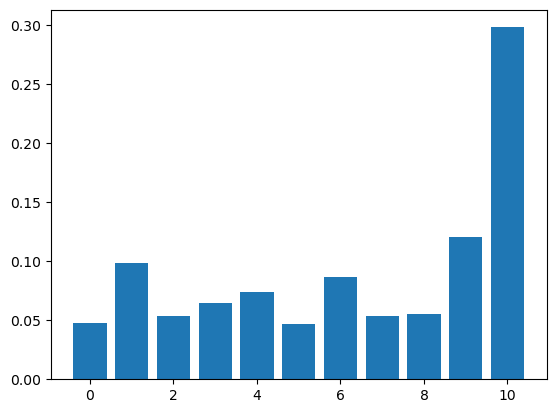

In [24]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
feature_columns = red_wine_data.columns
important_features = model.feature_importances_
for index, value in enumerate(important_features):
    print(f"Feature {index}: {feature_columns[index]}, Score: {value}")
plt.bar([x for x in range(len(important_features))], important_features)
plt.show()

*The figure shows the bar graph for the important features of the quality of red wine, the alcohol is the high-impact variable followed by sulphates and volatile acidity. free sulfur dioxide has minimum impact on the quality followed by total sulfur dioxide, residual sugar, citric acid, and fixed acidity. other variables have a slightly higher impact than these.*

### Conclusion

*To summarize, the ridge model metrics show some more accuracy than that of the Lasso but the model can be still improved. I tested the split of data to 50-50 and did some data analytics for the overall trend and impact of features on the target variable.
Both models are not tuned up to their limit and the data frame I have is also less. Removing the outliers is even narrowing the data frame. Furthermore, I have created the data for train and testing only, I can split data for the validation layer too with some hyperparameters tuning to make the prediction more accurate*